In [1]:
from predicu.predicu.data import load_all_data
from ddeint import ddeint
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import odeint, ode
from predicu.predicu.data import CUM_COLUMNS, NCUM_COLUMNS

import pandas as pd
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint

In [7]:
data = load_all_data()

NameError: name 'load_all_data' is not defined

In [6]:
data = clean_data

In [7]:
dep = data.groupby(['date', 'department','icu_name'])[CUM_COLUMNS+NCUM_COLUMNS].last().reset_index()
dep= dep.groupby(['date', 'department'])[CUM_COLUMNS+NCUM_COLUMNS].sum().reset_index()
dep
#occ_bas_rhin = np.array([70.0,80.0,100.0,101.0,106.0,115.0,114.0,124.0,142.0,152.0,153.0,157.0,165.0,172.0])

,date,department,n_covid_deaths,n_covid_healed,n_covid_transfered,n_covid_refused,n_covid_free,n_ncovid_free,n_covid_occ,n_ncovid_occ
0,2020-03-18,Ardennes,0,0,0,0,0,0,0,0
1,2020-03-18,Aube,0,0,0,0,0,0,0,0
2,2020-03-18,Bas-Rhin,3,4,0,0,12,0,87,0
3,2020-03-18,Haut-Rhin,9,1,0,0,1,0,66,0
4,2020-03-18,Marne,1,2,0,0,9,0,10,0
...,...,...,...,...,...,...,...,...,...,...
168,2020-04-03,Marne,10,12,9,25,19,25,93,5
169,2020-04-03,Meurthe-et-Moselle,12,41,21,26,6,0,96,14
170,2020-04-03,Meuse,3,2,1,0,3,0,17,3
171,2020-04-03,Moselle,33,25,34,10,15,4,66,10


In [8]:
dep['icu_cum'] = dep.n_covid_deaths + dep.n_covid_healed + dep.n_covid_transfered + dep.n_covid_refused + dep.n_covid_occ

In [9]:
dep

,date,department,n_covid_deaths,n_covid_healed,n_covid_transfered,n_covid_refused,n_covid_free,n_ncovid_free,n_covid_occ,n_ncovid_occ,icu_cum
0,2020-03-18,Ardennes,0,0,0,0,0,0,0,0,0
1,2020-03-18,Aube,0,0,0,0,0,0,0,0,0
2,2020-03-18,Bas-Rhin,3,4,0,0,12,0,87,0,94
3,2020-03-18,Haut-Rhin,9,1,0,0,1,0,66,0,76
4,2020-03-18,Marne,1,2,0,0,9,0,10,0,13
...,...,...,...,...,...,...,...,...,...,...,...
168,2020-04-03,Marne,10,12,9,25,19,25,93,5,149
169,2020-04-03,Meurthe-et-Moselle,12,41,21,26,6,0,96,14,196
170,2020-04-03,Meuse,3,2,1,0,3,0,17,3,23
171,2020-04-03,Moselle,33,25,34,10,15,4,66,10,168


In [ ]:
occ_bas_rhin= dep.loc[dep.department=='Bas-Rhin', 'n_covid_occ']

In [35]:
ill_dep_per_day = dep.groupby(['department'])[CUM_COLUMNS+NCUM_COLUMNS].diff()
ill_dep_per_day

,index,n_covid_deaths,n_covid_healed,n_covid_transfered,n_covid_refused,n_covid_free,n_ncovid_free,n_covid_occ,n_ncovid_occ
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
153,153,0.0,1.0,1.0,2.0,4.0,1.0,11.0,0.0
154,154,0.0,1.0,1.0,2.0,-5.0,0.0,5.0,0.0
155,155,0.0,0.0,1.0,0.0,1.0,0.0,-2.0,0.0
156,156,1.0,1.0,1.0,0.0,3.0,-2.0,-5.0,1.0


In [8]:
data.department.unique()

array(['Moselle', 'Ardennes', 'Haut-Rhin', 'Vosges', 'Meurthe-et-Moselle',
       'Bas-Rhin', 'Marne', 'Aube', 'Meuse', 'Loir-et-Cher', 'Cher',
       'Eure-et-Loir', 'Loiret', 'Indre-et-Loire', 'Indre', 'Finistere'],
      dtype=object)

In [9]:
len(occ_bas_rhin)

16

First check that model is alright and plot for non delayed ODE
$dX(t) = (\beta(t) - \nu_{h} - \nu_d) * X(t)$ for Bas Rhin e.g

In [14]:
beta_0=0.7
decrease= 'exp'
mu=0.07
T_crit=10
nu_h=0.2
nu_d = 0.2


def beta(beta_0, decrease, mu, T_crit, t):
    if decrease == 'exp':
        mu_t = mu * max(t-T_crit, 0)
        return beta_0*np.exp(-mu_t)
    if decrease == 'lin':
        mu_t = mu * max(t-T_crit, 0)
        return max(0, beta_0-mu_t)
    else:
        print('No decrease of transmission rate ?')
        return beta_0

Y_init = np.array(occ_bas_rhin)[0]
tspan = np.arange(14)
  
t = np.linspace(0,50,1000)

def SIR_wo_delay(Y,t, beta_0, mu, T_crit, nu_h, nu_d, decrease):
    beta_t = beta(beta_0, decrease, mu, T_crit, t)
    contam = beta_t* Y
    heal = nu_h*Y
    death = nu_d*Y
    return (contam -heal-death )



y_mod = odeint(lambda Y,t : SIR_wo_delay(Y=Y, t=t,beta_0=beta_0, mu=mu, T_crit=T_crit, nu_h=nu_h, nu_d=nu_d, decrease=decrease), Y_init, tspan)

In [15]:
y_mod

array([[  87.        ],
       [ 117.43771597],
       [ 158.52433608],
       [ 213.98547368],
       [ 288.85017717],
       [ 389.90695907],
       [ 526.31934107],
       [ 710.45679973],
       [ 959.01637065],
       [1294.53670061],
       [1747.44177262],
       [2303.0047566 ],
       [2899.59343138],
       [3498.4164472 ]])

In [16]:
###Fit parameters for one department

def fitfunc(t, beta_0, mu, T_crit, nu_h, nu_d):
    y = odeint(lambda Y,t : SIR_wo_delay(Y=Y, t=t,beta_0=beta_0, mu=mu, T_crit=T_crit, nu_h=nu_h, nu_d=nu_d, decrease=decrease), 
               Y_init, t)
    return y[:,0]


tspan = np.arange(len(occ_bas_rhin))
params_fit, _ = curve_fit(fitfunc, tspan, occ_bas_rhin, bounds = (0, [1., 1., 12., 1.,1.]))

In [18]:
beta_0, mu, T_crit, nu_h, nu_d = params_fit

In [19]:
beta_0

0.9999999987282134

In [24]:
tspan = np.linspace(0,50,200)
def func(t, params_fit):
    beta_0, mu, T_crit, nu_h, nu_d = params_fit
    return fitfunc(t, beta_0, mu, T_crit, nu_h, nu_d)

y_mod=func(tspan, params_fit)

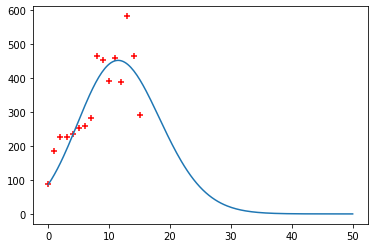

In [25]:
plt.plot(tspan,y_mod)
plt.scatter(range(len(np.array(occ_bas_rhin))), np.array(occ_bas_rhin), marker = "+", color='red')
plt.show()

In [140]:
### TO DO: SYSTEM OF ODES FOR DEPARTMENTS
dep_to_fit = ['Marne', 'Bas-Rhin', 'Haut-Rhin', 'Moselle',  'Vosges','Meurthe-et-Moselle']


n_dep = len(dep_to_fit)
data_dep = list()
for d in dep_to_fit:
    dep_aux = np.array(dep.loc[dep.department==d, 'n_covid_occ'], ndmin=2)
    data_dep.append(dep_aux)

data_dep= np.nan_to_num(np.concatenate(data_dep, axis = 0))
##Assume same params for each dpt
##Starting params
beta_0=0.7
decrease= 'exp'
mu=0.07
T_crit=10
nu_h=0.2
nu_d = 0.2



In [11]:
data_dep

array([[  8.,  13.,  13.,  15.,  23.,  24.,  50.,  62.,  66.,  71.,  73.,
         75.,  82.,  83.],
       [ 70.,  80., 100., 101., 106., 115., 114., 124., 142., 152., 153.,
        157., 165., 172.],
       [ 64.,  78.,  75.,  82.,  86.,  83.,  78.,  86.,  86.,  87.,  94.,
         95., 101., 104.],
       [ 32.,  36.,  66.,  78.,  91., 103., 110., 117., 119., 122., 132.,
        139., 148., 151.],
       [  4.,   5.,   9.,   9.,  10.,   9.,  17.,  17.,  19.,  19.,  19.,
         20.,  21.,  21.],
       [ 50.,  61.,  79.,  82.,  94., 100., 106., 119., 125., 206., 192.,
        196., 198., 199.]])

In [141]:



def SIR_wo_delay(Y,t, beta_0, mu, T_crit, nu_h, nu_d, decrease):
    beta_t = beta(beta_0, decrease, mu, T_crit, t)
    contam = beta_t* Y
    heal = nu_h*Y
    death = nu_d*Y
    return (contam -heal-death ) ###Can be a vector of size len(dep_to_fit)

def beta(beta_0, decrease, mu, T_crit, t):
    if decrease == 'exp':
        mu_t = mu * max(t-T_crit, 0)
        return beta_0*np.exp(-mu_t)
    if decrease == 'lin':
        mu_t = mu * max(t-T_crit, 0)
        return max(0, beta_0-mu_t)
    else:
        print('No decrease of transmission rate ?')
        return beta_0

Y_init = data_dep[:,0]
  

    
def fitfunc(t, beta_0, mu, T_crit, nu_h, nu_d):
    y = odeint(lambda Y,t : SIR_wo_delay(Y=Y, t=t,beta_0=beta_0, mu=mu, T_crit=T_crit, nu_h=nu_h, nu_d=nu_d, decrease=decrease), 
               Y_init, t)
    return y[:,0].ravel() - data_dep.ravel()

tspan= np.arange(np.shape(data_dep)[1])



#params_fit, _ = curve_fit(fitfunc, tspan, np.zeros(np.size(data_dep.ravel())), bounds = (0, [1., 1., 12., 1.,1.]))

In [10]:
?np.ravel

Signature: np.ravel(a, order='C')
Docstring:
Return a contiguous flattened array.

A 1-D array, containing the elements of the input, is returned.  A copy is
made only if needed.

As of NumPy 1.10, the returned array will have the same type as the input
array. (for example, a masked array will be returned for a masked array
input)

Parameters
----------
a : array_like
    Input array.  The elements in `a` are read in the order specified by
    `order`, and packed as a 1-D array.
order : {'C','F', 'A', 'K'}, optional

    The elements of `a` are read using this index order. 'C' means
    to index the elements in row-major, C-style order,
    with the last axis index changing fastest, back to the first
    axis index changing slowest.  'F' means to index the elements
    in column-major, Fortran-style order, with the
    first index changing fastest, and the last index changing
    slowest. Note that the 'C' and 'F' options take no account of
    the memory layout of the underlying array

###Thinking about the model


$dn_{occ}(t) = n_{occ}(t-T_{inc}) \times \beta(t-T_{inc}) -  d n_{death}(t) - d n_{heal}(t)$

$d n_{death}(t) = \nu_d n_{occ}(t-T_{d})$

$d n_{heal}(t) = \nu_h n_{occ}(t-T_{h})$

Hence fit first $\nu_d, T_d$ and $\nu_h, T_h$ from data

Then 
$dn_{occ}(t) = n_{occ}(t-T_{inc}) \times \beta(t-T_{inc}) -  \nu_d n_{occ}(t-T_{d}) - \nu_h n_{occ}(t-T_{h})$ with fixed params  $\nu_d, T_d$ and $\nu_h, T_h$.

In [116]:
params_fit

array([ 0.5,  1. ,  6. ,  0.5,  0.5])

In [122]:
np.shape(data_dep)[1]

14

##DELAY DIFFERENTIAL EQUATION FOR THE MODEL

In [12]:
###TO WORK ON : DELAY DIFFERENTIAL EQUATIONS


params= {'T_inc' : 0,
         'T_d' : 0,
         'T_h' : 0,
         'beta_0': 0.7,
         'decrease': 'exp',
         'mu': 0.07,
         'T_crit': 10,
         'nu_h':0.2,
         'nu_d':0.2}

def beta(beta_0, decrease, mu, T_crit, t):
    if decrease == 'exp':
        mu_t = mu * max(t-T_crit, 0)
        return beta_0*np.exp(-mu_t)
    if decrease == 'lin':
        mu_t = mu * max(t-T_crit, 0)
        return max(0, beta_0-mu_t)
    else:
        print('No decrease of transmission rate ?')
        return beta_0

def values_before_zero(t):
    return 70-2*t
    

def SIR(Y,t, params):
    Y = np.max(Y,0)
    beta_t = beta(params['beta_0'],params['decrease'], params['mu'], params['T_crit'], t)
    contam = beta_t* Y(t-params['T_inc'])
    heal = params['nu_h']*Y(t-params['T_h'])
    death = params['nu_d']*Y(t-params['T_d'])
    return (contam -heal-death )
         
tmax = 1
tt = np.linspace(0, tmax, tmax)
         
yy = ddeint(SIR, values_before_zero, tt, fargs = (params,))




In [55]:
np.concatenate([np.array(yy[0], ndmin=1),np.concatenate(yy[1:])])

array([ 7.00000000e+01,  9.15000000e+01,  1.13000000e+02,  1.34500000e+02,
        1.60447123e+02,  2.08233908e+02,  2.57514096e+02,  3.06794284e+02,
        3.56074472e+02,  4.65196107e+02,  6.04002512e+02,  7.65157907e+02,
        9.09299412e+02,  1.06400382e+03,  1.19044356e+03,  1.30861518e+03,
        1.38784457e+03,  1.43220701e+03,  1.43543480e+03,  1.39880406e+03,
        1.32512116e+03,  1.22252425e+03,  1.09790741e+03,  9.50619211e+02,
        8.04989381e+02,  6.52756959e+02,  5.15735457e+02,  3.89465092e+02,
        2.88479945e+02,  2.10898780e+02,  1.58871665e+02,  1.06716928e+02,
        7.20473480e+01,  4.33447262e+01,  2.43815621e+01,  1.19099633e+01,
        3.74127412e+00,  9.38529622e-01,  6.64603027e-02, -8.22794441e-02,
       -8.57390802e-02, -5.76149130e-02, -3.64277804e-02])

In [12]:
plt.plot(tt,yy)
plt.plot(tt[0:len(np.array(occ_bas_rhin))], np.array(occ_bas_rhin))
plt.savefig('model2.png')

In [92]:
[l for l in params]

['beta_0', 'T_crit', 'T_d', 'nu_h', 'T_h', 'nu_d', 'T_inc', 'mu', 'decrease']

In [51]:
tspan = np.linspace(0, 14, 14)
data = np.array(occ_bas_rhin)
T_inc=9
T_d=7
T_h=7
beta_0=0.76578051
decrease= 'exp'
mu=0.07
T_crit=7
nu_h=0.25600226
nu_d=0.42394311
T_init = 5

def SIR2(Y,t, beta_0, decrease, mu, T_crit, nu_h,nu_d ):
    Y = np.max(Y,0)
    beta_t = beta(beta_0, decrease, mu, T_crit, t)
    contam = beta_t* np.max(Y(t-T_inc),0)
    heal = nu_h*np.max(Y(t-T_h),0)
    death = nu_d*np.max(Y(t-T_d),0)
    return (contam -heal-death )

def values_before_zero(t):
    return 70-2*t
    


In [52]:
def fitfunc(t, beta_0, mu, T_crit, nu_h, nu_d):
    y = ddeint(lambda Y,t : SIR2(Y=Y, t=t,beta_0=beta_0, mu=mu, T_crit=T_crit, nu_h=nu_h, nu_d=nu_d, decrease=decrease), 
               values_before_zero, t)
    return np.concatenate([np.array(y[0], ndmin=1),np.concatenate(y[1:])])


tspan = np.arange(len(occ_bas_rhin))
params_fit, _ = curve_fit(fitfunc, tspan, occ_bas_rhin, bounds = (0, [1., 1., 12., 1.,1.]))

In [53]:
params_fit

array([ 0.75108068,  0.19524008, 10.08767549,  0.34434686,  0.34352639])

In [31]:
#fitfunc(t,0.73006232, 0.11837316, 8.68094372, 0.33414977, 0.24531347)

In [65]:
t = np.linspace(0,20,50)
yy = fitfunc(t, 0.75108068,  0.19524008, 10.08767549,  0.34434686,  0.34352639)

In [66]:
yy

array([  70.        ,   73.38280087,   76.74457638,   80.08529151,
         83.40494628,   86.70354068,   89.98107472,   93.23754838,
         96.47296168,   99.6873146 ,  102.88060716,  106.05283935,
        109.20401118,  112.33412263,  115.44317372,  118.53116444,
        121.59809479,  124.64396477,  127.242797  ,  128.65715523,
        128.87947275,  127.91561083,  125.77171194,  123.03413582,
        120.4108466 ,  117.82449984,  113.91459731,  108.18546603,
        100.64069619,   91.29005172,   80.14846215,   67.23522169,
         52.57343438,   36.18889198,   18.10966608,   -1.59084233,
        -22.68815609,  -44.82446415,  -67.63862942,  -90.77025295,
       -113.93693852, -137.07788144, -160.26838366, -183.41427752,
       -206.11525019, -227.8485481 , -248.04799051, -266.13401571,
       -281.56951974, -293.86892209])

In [69]:
plt.plot(t, yy)
plt.plot(tspan, fitfunc(tspan, 0.75108068,  0.19524008, 10.08767549,  0.34434686,  0.34352639))
plt.scatter(tspan, occ_bas_rhin, marker='+')
plt.savefig('model2_fit.pdf')
plt.close()